In [59]:
import pandas as pd
import numpy as np

In [60]:
data = pd.read_csv("Dataset/used_device_data.csv")

In [61]:
df = data.copy()

In [62]:
df.head(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


## Data Processing

In [63]:
df.shape

(3454, 15)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3454 non-null   object 
 1   os                3454 non-null   object 
 2   screen_size       3454 non-null   float64
 3   4g                3454 non-null   object 
 4   5g                3454 non-null   object 
 5   main_camera_mp    3275 non-null   float64
 6   selfie_camera_mp  3452 non-null   float64
 7   int_memory        3450 non-null   float64
 8   ram               3450 non-null   float64
 9   battery           3448 non-null   float64
 10  weight            3447 non-null   float64
 11  release_year      3454 non-null   int64  
 12  days_used         3454 non-null   int64  
 13  new_price         3454 non-null   float64
 14  used_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


In [65]:
df.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,237.038848,92.302936
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,194.302782,54.701648
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,18.200000,4.650000
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,120.342500,56.482500
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,189.785000,81.870000
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,291.115000,116.245000
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,2560.200000,749.520000


In [66]:
# checking for null values
df.isna().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      179
selfie_camera_mp      2
int_memory            4
ram                   4
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [67]:
df.isna().sum() * 100 / len(df)

brand_name          0.000000
os                  0.000000
screen_size         0.000000
4g                  0.000000
5g                  0.000000
main_camera_mp      5.182397
selfie_camera_mp    0.057904
int_memory          0.115808
ram                 0.115808
battery             0.173712
weight              0.202664
release_year        0.000000
days_used           0.000000
new_price           0.000000
used_price          0.000000
dtype: float64

In [68]:
below_cols = ["selfie_camera_mp", "int_memory" , "ram", "battery", "weight"]

In [69]:
df =df.dropna(subset = below_cols)

In [70]:
df.isna().sum() * 100 / len(df)

brand_name          0.000000
os                  0.000000
screen_size         0.000000
4g                  0.000000
5g                  0.000000
main_camera_mp      5.215618
selfie_camera_mp    0.000000
int_memory          0.000000
ram                 0.000000
battery             0.000000
weight              0.000000
release_year        0.000000
days_used           0.000000
new_price           0.000000
used_price          0.000000
dtype: float64

In [71]:
df["main_camera_mp"] = df["main_camera_mp"].fillna(df["main_camera_mp"].mode()[0])

In [72]:
df.isna().sum() * 100 / len(df)

brand_name          0.0
os                  0.0
screen_size         0.0
4g                  0.0
5g                  0.0
main_camera_mp      0.0
selfie_camera_mp    0.0
int_memory          0.0
ram                 0.0
battery             0.0
weight              0.0
release_year        0.0
days_used           0.0
new_price           0.0
used_price          0.0
dtype: float64

In [73]:
df.head(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [74]:
df.duplicated().sum()

np.int64(0)

## EDA

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [76]:
usage_plot = df["brand_name"].value_counts()
usage_plot

brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Motorola      106
Nokia          97
Sony           86
Meizu          59
Gionee         56
Acer           51
Panasonic      47
XOLO           42
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
BlackBerry     22
OnePlus        22
Coolpad        22
Microsoft      21
Google         13
Infinix        10
Name: count, dtype: int64

In [77]:
fig = px.bar(
    usage_plot,
    x=usage_plot.index,
    y=usage_plot.values,
    labels={"x": "Brand Name", "y": "Usage Count"},
    title="Brand Usage Count",
    color = usage_plot.index
)
fig.show()

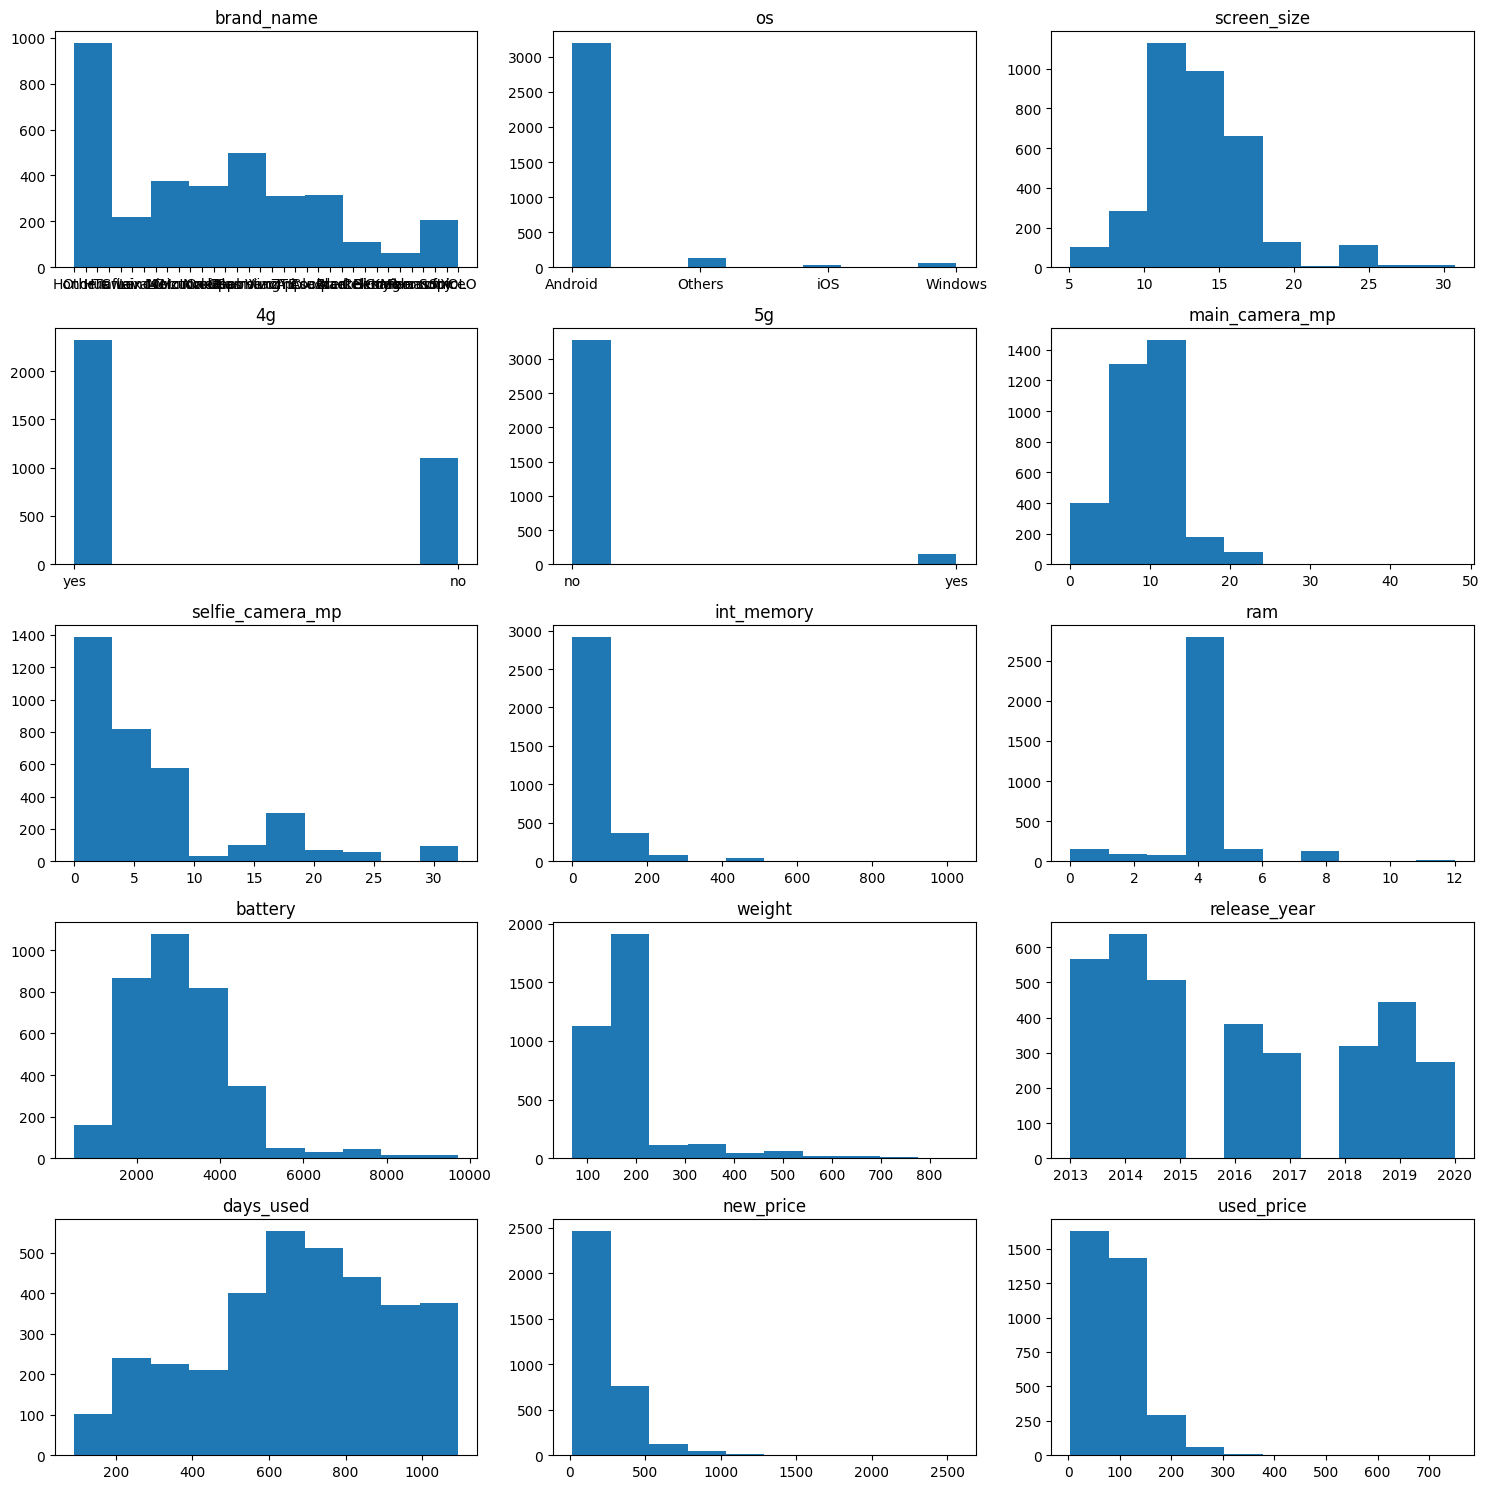

In [78]:
fig,axs= plt.subplots(5,3,figsize=(15, 15))
# Flatten the 2D array of subplots to make them easier to access
axs = axs.ravel()
for i, feature in enumerate(df.columns):
    # Plot a histogram of the feature in the current subplot
    axs[i].hist(df[feature])
    axs[i].set_title(feature)


# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

## Normalization

In [79]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


In [80]:
df["brand_name"].unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [81]:
df["os"].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

In [82]:
df["4g"].unique()

array(['yes', 'no'], dtype=object)

In [83]:
df["5g"].unique()

array(['no', 'yes'], dtype=object)

In [84]:
df["brand_name"] = df["brand_name"].map({'Others':34, 'Honor':1, 'HTC':2, 'Huawei':3, 'Infinix':4, 'Lava':5, 'Lenovo':6,
       'LG':7, 'Meizu':8, 'Micromax':9, 'Motorola':10, 'Nokia':11, 'OnePlus':12, 'Oppo':13,
       'Realme':14, 'Samsung':15, 'Vivo':16, 'Xiaomi':17, 'ZTE':18, 'Apple':19, 'Asus':20,
       'Coolpad':21, 'Acer':22, 'Alcatel':23, 'BlackBerry':24, 'Celkon':25, 'Gionee':26,
       'Google':27, 'Karbonn':28, 'Microsoft':29, 'Panasonic':30, 'Sony':31, 'Spice':32,
       'XOLO':33})

In [85]:
df["brand_name"].unique()

array([ 1, 34,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [86]:
# codes, uniques = pd.factorize(df["brand_name"])

# # Creating the mapping
# brand_mapping = dict(enumerate(uniques))

# # Display the mapping
# brand_mapping

In [87]:
df["4g"] = df["4g"].map({'yes': 1 , 'no' : 0})
df["5g"] = df["5g"].map({'yes': 1 , 'no' : 0})
df["os"] = df["os"].map({'Android': 1 ,  'iOS' : 2, 'Windows' : 3,'Others' : 4})

In [88]:
df.head(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,1,1,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,1,1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,1,1,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,1,1,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,1,1,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


## Feature engineering

In [89]:
X = df.drop(["used_price"], axis = 1)

In [90]:
y = df["used_price"]

In [91]:
X.head(3)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price
0,1,1,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62
1,1,1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39
2,1,1,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47


In [92]:
y.head(5)

0     74.26
1    174.53
2    165.85
3    169.93
4     80.64
Name: used_price, dtype: float64

In [93]:
## checking for the mi scores
from sklearn.feature_selection import mutual_info_regression

In [94]:
mi_score = mutual_info_regression(X,y)
mi_score = pd.Series(mi_score, name = "MI Score" , index= X.columns)
mi_score = mi_score.sort_values(ascending = False)
mi_score

new_price           0.613169
screen_size         0.498356
battery             0.423579
selfie_camera_mp    0.402436
main_camera_mp      0.362896
int_memory          0.356704
weight              0.327465
ram                 0.209278
release_year        0.205471
4g                  0.182376
brand_name          0.161286
days_used           0.073608
5g                  0.067731
os                  0.063777
Name: MI Score, dtype: float64

In [95]:
df.head(5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,1,1,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,74.26
1,1,1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,174.53
2,1,1,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,165.85
3,1,1,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,169.93
4,1,1,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,80.64


## scaling

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scale_col = ["screen_size", "main_camera_mp" , "selfie_camera_mp", "int_memory" , "ram", "battery", "weight", "release_year", 
            "days_used", "new_price"]
scale_col

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'new_price']

In [98]:
ss = StandardScaler()
ss.fit_transform(X[scale_col])

array([[ 0.20228748,  0.70464724, -0.22673613, ...,  1.75457565,
        -2.20447379, -0.64857525],
       [ 0.94141643,  0.70464724,  1.34961468, ...,  1.75457565,
        -1.40707266,  0.06217795],
       [ 0.78039191,  0.70464724,  0.20317772, ...,  1.75457565,
        -2.06351904,  0.63007888],
       ...,
       [ 0.54545449,  0.70464724, -0.22673613, ...,  1.75457565,
        -1.90645518, -0.74644117],
       [ 0.54545449,  0.70464724, -0.22673613, ...,  1.75457565,
        -2.11587366, -0.69861739],
       [-0.23855015,  0.70464724, -0.22673613, ...,  1.75457565,
        -2.00713715, -0.85173603]])

## Train / Test Split

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

## Model Selection and Evaluation

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
lr = LinearRegression()
lr.fit(X_train,y_train)

sv = SVR()
sv.fit(X_train,y_train)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [103]:
ypred1 = lr.predict(X_test)
ypred2 = sv.predict(X_test)
ypred3 = rf.predict(X_test)
ypred4 = gb.predict(X_test)

In [104]:
ypred1,ypred2,ypred3,ypred4

(array([ 38.78526277,  44.11105119, 140.13817192,  52.90259142,
         60.76094834, 172.45935054,  59.79230242,  44.51859771,
        100.9464044 ,  70.37995252,  72.75082558,  80.90391498,
         62.79110996,  75.71896615,  55.22110037, 112.24791702,
        146.05891807,  69.00699332, 108.79861891,  79.37728347,
        186.9066707 , 120.69038329,  39.01831835, 197.20415094,
        130.85118858,  82.99814849,  67.28136589,  48.95382225,
        121.82349867, 154.41548372, 115.83127794,  37.6943728 ,
         74.60292047,  77.71299735, 124.75109356,  52.22343101,
         58.45116576,  70.12729717, 130.19591417,  45.88822265,
        134.42393765,  89.92108551, 206.47711248,  52.50944974,
        147.01400222,  73.32174638,  36.36245963,  62.38781849,
        104.64760731,  87.66555629, 137.10860272, 106.47907181,
         78.68606815, 139.16566627,  56.25854078,  81.79474771,
        135.49550986,  62.73866081,  35.50663942,  58.62209329,
        185.96269737, 154.83432509, 142.

In [105]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [106]:
ev1 = metrics.r2_score(y_test,ypred1)
ev2 = metrics.r2_score(y_test,ypred2)
ev3 = metrics.r2_score(y_test,ypred3)
ev4 = metrics.r2_score(y_test,ypred4)

In [107]:
ev1 , ev2 , ev3 , ev4

(0.8133912711207024,
 0.35779872341826546,
 0.7238887698532499,
 0.7280226315475641)

In [108]:
evaluation = pd.DataFrame({
    'Alogirthms':['LinearRegression','SVR','RandomForestRegressor','GradientBoostingRegressor'],
    'Predicted Result':[ev1 , ev2 , ev3 , ev4]
})

In [109]:
evaluation

,Alogirthms,Predicted Result
0,LinearRegression,0.813391
1,SVR,0.357799
2,RandomForestRegressor,0.723889
3,GradientBoostingRegressor,0.728023


In [110]:
fig = px.bar(
    evaluation,
    y = 'Alogirthms',
    x = 'Predicted Result',
    color='Alogirthms',
    text_auto=',.0%'
)
fig.show()

In [111]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [112]:
import joblib

In [113]:
#saving the model
joblib.dump(lr,"Used_Price_model")

['Used_Price_model']

In [114]:
#saving the scaler
joblib.dump(ss, "scaler_used")

['scaler_used']

In [115]:
model = joblib.load("Used_Price_model")
scaler = joblib.load("scaler_used")